## Primera prueba de procesado de datos:
### Author y geometry serán eliminados.
### Los outliers los mantenemos.
### Nulls en numéricas serán imputados  CONDICIONAL, o con media o moda, según distribución de cada variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [2]:
data_raw = pd.read_csv('../data/raw_data/data.csv')

In [3]:
data_primer_procesado = data_raw.copy()

In [4]:
# Apartamos la columna id y la eliminamos del dataset
id = data_raw['id']
data_primer_procesado = data_primer_procesado.drop('id', axis=1)

In [139]:
data_primer_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               26620 non-null  object 
 1   geometry             26144 non-null  object 
 2   pressure [MPa]       31644 non-null  float64
 3   mass_flux [kg/m2-s]  31644 non-null  float64
 4   x_e_out [-]          21229 non-null  float64
 5   D_e [mm]             31644 non-null  float64
 6   D_h [mm]             31644 non-null  float64
 7   length [mm]          31644 non-null  float64
 8   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [6]:
pd.set_option('display.max_rows', None)

In [92]:
data_primer_procesado.groupby('D_e [mm]').count()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_h [mm],length [mm],chf_exp [MW/m2]
D_e [mm],,,,,,,,
1.0,156,154,161,143,112,186,173,186
1.1,14,17,16,15,12,12,16,18
1.7,6,8,6,8,6,6,8,8
1.9,2516,2421,2555,2513,1988,2956,2532,2956
3.0,458,462,482,490,380,568,485,568
3.6,281,271,288,275,225,335,300,335
4.6,641,631,659,637,514,761,647,761
4.7,2376,2414,2465,2465,1940,2888,2439,2888
5.0,156,153,163,159,130,167,165,189


## Rellenamos D_e a partir de los valores de D_h a mano, y al revés.
Donde D_e 96.3, D_h 22.2 Y AL REVÉS. ok
Donde D_h 10.8, D_e 10.8 Y AL REVÉS. ok
donde D_h 10.3, D_e 10.3 Y AL REVÉS. ok
Donde 4.7, 4.7 en los dos. ok
Donde 1.9, 1.9 en los dos. ok
Donde 7.7, 7.7 en los dos. ok
Donde 5,6 en D_e, 15.2 en D_h y AL REVÉS. ok
Donde 7.8, 7.8 EN LOS DOS. ok
	OJO 10, 10 en los 2? Revisar porque hay alguno con 40. ok
Donde 9.5, 9.5 en los 2 ok
	OJO D_e 12.7, D_h puede ser 42.3 o 38.1. Cojo 38.1 por MEDIA. ok
Donde 11.1, 11.1 en los dos. ok
Donde 23.6, 23.6 en los dos. ok
Donde 11.5, 11.5 en los dos. ok
Donde D_e 12.7, 38.1 en D_h. ok
Donde D_e 15, D_h 120, y al revés. ok
	OJO D_e 4.6, D_h puede ser 4.6 o 11.3, revisar otras variables. Cojo 4.6 por MODA. ok
Viceversa:  3.0 | 5.7 | 12.8 | 37.5 | 3.6 | 1 | 9.3 ok

## Rellenamos D_e a partir de los valores de lenght [mm] a mano, y al revés.
length  D_e
457.0        7.7 ok
762.0        10.3 ok
318.0        4.7 ok

## Rellenamos D_h desde lenght a mano
length  D_h
457.0        7.7         
762.0        10.3        
318.0        4.7         
152.0        1.9         
2134.0       15.2        
591.0        7.8         

## Intento rellenar mass_flux a mano pero la muestra está atomizada así que imputo con la media, ya que me dio buen resultado en el primer modelo.

In [133]:
data_primer_procesado['mass_flux [kg/m2-s]'] = data_primer_procesado['mass_flux [kg/m2-s]'].fillna(data_primer_procesado['mass_flux [kg/m2-s]'].mean())

In [126]:
# Rellenamos D_e [mm] con el valor 120 cuando D_h [mm] vale 120
data_primer_procesado.loc[data_primer_procesado['D_h [mm]'] == 7.8, 'length [mm]'] = data_primer_procesado.loc[
    data_primer_procesado['D_h [mm]'] == 7.8, "length [mm]"].fillna(591.0)
                          


## Estas variables numéricas las rellenamos con la moda, ya que es más adecuado para su distribución puesto que cuentan con muchos outliers.
### mass_flux, D_h [mm], length [mm]

In [137]:
# Rellenamos data_filled con la moda de cada columna para, D_h[mm], length [mm], 'D_e [mm]'

moda_D_h = data_primer_procesado['D_h [mm]'].mode()
moda_length = data_primer_procesado['length [mm]'].mode()
moda_D_e = data_primer_procesado['D_e [mm]'].mode()

In [7]:
moda_D_e

0    10.3
dtype: float64

In [138]:
data_primer_procesado['D_h [mm]'] = data_primer_procesado['D_h [mm]'].fillna(moda_D_e.values[0])
data_primer_procesado['length [mm]'] = data_primer_procesado['length [mm]'].fillna(moda_length.values[0])
data_primer_procesado['D_e [mm]'] = data_primer_procesado['D_e [mm]'].fillna(moda_D_e.values[0])

In [9]:
data_primer_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               26620 non-null  object 
 1   geometry             26144 non-null  object 
 2   pressure [MPa]       27192 non-null  float64
 3   mass_flux [kg/m2-s]  26853 non-null  float64
 4   x_e_out [-]          21229 non-null  float64
 5   D_e [mm]             31644 non-null  float64
 6   D_h [mm]             31644 non-null  float64
 7   length [mm]          31644 non-null  float64
 8   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


## Estas variables numéricas las rellenamos con la media, ya que es más adecuado para su distribución puesto que no tienen outliers.
### mass_flux [kg/m2-s],  pressure [MPa]


In [135]:
# Rellenamos data_filled con la media de cada columna para mass_flux [kg/m2-s], pressure [MPa]
data_primer_procesado['mass_flux [kg/m2-s]'] = data_primer_procesado['mass_flux [kg/m2-s]'].fillna(data_primer_procesado['mass_flux [kg/m2-s]'].mean())
data_primer_procesado['pressure [MPa]'] = data_primer_procesado['pressure [MPa]'].fillna(data_primer_procesado['pressure [MPa]'].mean())


## Eliminamos las columnas categóricas
### author y geometr

In [140]:
# Eliminamos author y geometry
data_primer_procesado = data_primer_procesado.drop(['author', 'geometry'], axis=1)

In [141]:
data_primer_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure [MPa]       31644 non-null  float64
 1   mass_flux [kg/m2-s]  31644 non-null  float64
 2   x_e_out [-]          21229 non-null  float64
 3   D_e [mm]             31644 non-null  float64
 4   D_h [mm]             31644 non-null  float64
 5   length [mm]          31644 non-null  float64
 6   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


# Dividimos el dataset, quitando las que tengan null en x_e_out [-]


In [145]:
# Dividimos el dataset, dejando aparte las filas que tengan nan en x_e_out [-]
data_primer_procesado_target = data_primer_procesado[data_primer_procesado['x_e_out [-]'].isna()].copy()
data_primer_procesado_entrenamiento = data_primer_procesado.dropna(subset=['x_e_out [-]']).copy()

In [146]:
data_primer_procesado_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10415 entries, 4 to 31642
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure [MPa]       10415 non-null  float64
 1   mass_flux [kg/m2-s]  10415 non-null  float64
 2   x_e_out [-]          0 non-null      float64
 3   D_e [mm]             10415 non-null  float64
 4   D_h [mm]             10415 non-null  float64
 5   length [mm]          10415 non-null  float64
 6   chf_exp [MW/m2]      10415 non-null  float64
dtypes: float64(7)
memory usage: 650.9 KB


## Creamos función para guardar los csv que nos interesen para empezar a crear modelos.


In [147]:
def csv_datos(nombre_archivo, data):
    '''Guarda el dataframe data en un archivo csv con nombre nombre_archivo
    en la carpeta data/processed'''
    ruta_archivo = '../data/processed'
    data.to_csv(ruta_archivo + "/" + nombre_archivo, sep='\t', index=False)


In [148]:
csv_datos("quinto_procesado_a_entrenamiento.csv", data_primer_procesado_entrenamiento)

In [149]:
csv_datos("quinto_procesado_a_target.csv", data_primer_procesado_target)

In [66]:
pd.set_option('display.max_rows', None)

In [69]:
print(data_raw.groupby(['geometry', 'D_e [mm]', 'D_h [mm]'])['id'].count().sort_values(ascending=False))

geometry  D_e [mm]  D_h [mm]
tube      10.3      10.3        1880
          10.8      10.8        1790
          4.7       4.7         1754
          1.9       1.9         1723
          7.7       7.7         1642
annulus   5.6       15.2        1053
tube      7.8       7.8          913
          10.0      10.0         753
          9.5       9.5          604
annulus   12.7      42.3         585
tube      11.1      11.1         537
          23.6      23.6         445
          11.5      11.5         433
annulus   12.7      38.1         430
plate     15.0      120.0        420
tube      4.6       4.6          414
          5.6       5.6          388
          3.0       3.0          328
annulus   6.4       15.9         293
tube      5.7       5.7          269
annulus   8.5       22.3         255
tube      12.8      12.8         255
          37.5      37.5         194
          3.6       3.6          186
annulus   8.5       24.6         168
          5.0       13.3         128
tube     

<AxesSubplot:xlabel='D_e [mm]', ylabel='D_h [mm]'>

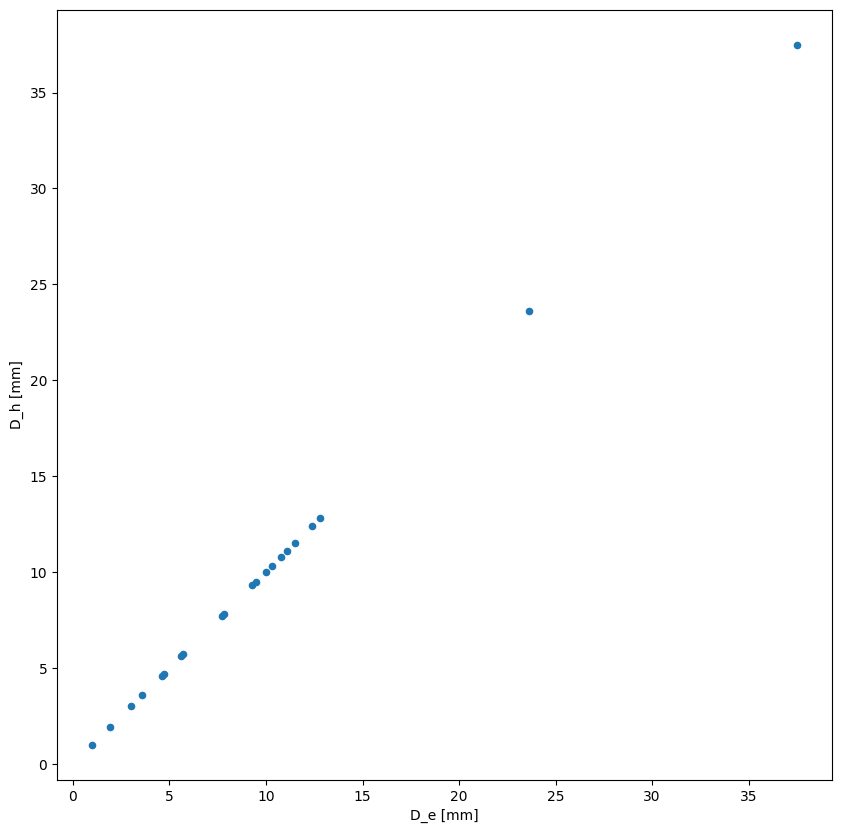

In [90]:
df = pd.DataFrame(data_raw.groupby(['geometry', 'D_e [mm]', 'D_h [mm]'])['id'].count())
df.reset_index(inplace=True)
sr = df.groupby(['geometry', 'D_e [mm]', 'D_h [mm]'])['id'].max()
sr_aux = pd.DataFrame(sr.sort_values(ascending=False).iloc[:30]).reset_index()

sr_aux[sr_aux["geometry"]=="tube"].plot(y="D_h [mm]", x="D_e [mm]", kind="scatter", figsize=(10, 10))